# Stable Diffusion XL Turbo

[Stability AI Image Models](https://stability.ai/stable-image)

[SDXL-Turbo Model Card](https://huggingface.co/stabilityai/sdxl-turbo)

[Diffusers > Specific Pipeline Examples > Stable Diffusion XL Turbo](https://huggingface.co/docs/diffusers/using-diffusers/sdxl_turbo)

## Outline

- [Setup](#setup)
- [Load model checkpoints](#load-model-checkpoints)
- [Text-to-image](#text-to-image)
- [Image-to-image](#image-to-image)

## Setup <a id='setup'></a>

In [1]:
# uncomment to install necessary libraries
# !pip install -q diffusers transformers accelerate omegaconf

In [2]:
# Import packages
from diffusers import AutoPipelineForText2Image, AutoPipelineForImage2Image
from diffusers.utils import load_image
import torch

## Load model checkpoints <a id='load-model-checkpoints'></a>

In [3]:
# Initiate pipeline with SDXL Turbo model
# Set dtype to float16 precision
pipe = AutoPipelineForText2Image.from_pretrained('stabilityai/sdxl-turbo', torch_dtype=torch.float16, variant='fp16')

# Move pipeline to local M2 device to use Metal framework to leverage GPU
pipe = pipe.to('mps')

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
# Recommended if your computer has < 64 GB of RAM
# Reduce memory pressure during inference and prevent swapping.
# Attention slicing performs the costly attention operation in multiple steps instead of all at once.
# pipe.enable_attention_slicing()

In [5]:
# Speed-up SDXL Turbo even more
# Compile the UNet.
# pipe.unet = torch.compile(pipe.unet, mode='reduce-overhead', fullgraph=True)

# Keep default VAE in float32 to avoid costly dtype conversions before and after each generation.
pipe.upcast_vae()

## Text-to-image <a id='text-to-image'></a>

  0%|          | 0/1 [00:00<?, ?it/s]

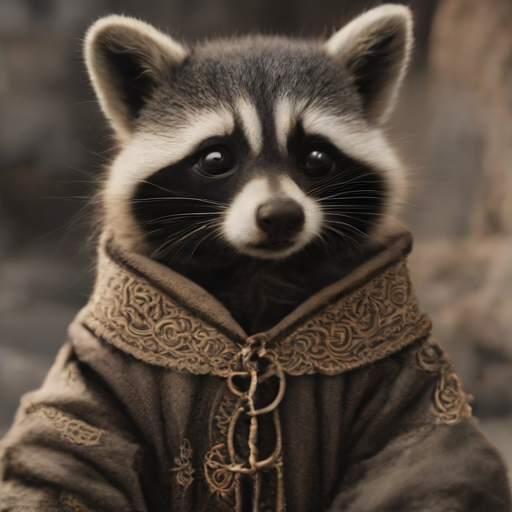

In [6]:
# Pass a text prompt
prompt = 'A cinematic shot of a baby racoon wearing wearing an intricate italian priest robe.'

# Set guidance_scale to 0.0 to disable, as the model was trained without it.
# A single inference step is enough to generate high quality images.
# Increasing the number of steps to 2, 3 or 4 should improve image quality.
# Generate image
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]

# Display image
image

## Image-to-image <a id='image-to-image'></a>

  0%|          | 0/2 [00:00<?, ?it/s]

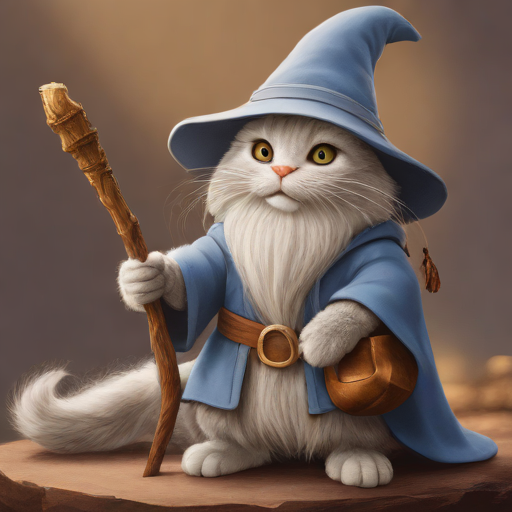

In [7]:
# Load initial image and resize to 512x512
init_image = load_image('https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/cat.png').resize((512, 512))

# Pass a text prompt
prompt = 'cat wizard, gandalf, lord of the rings, detailed, fantasy, cute, adorable, Pixar, Disney, 8k'

# Generate image
image = pipe(prompt=prompt, image=init_image, num_inference_steps=2, strength=0.5, guidance_scale=0.0).images[0]

# Display image
image